# Preview mean projection along z-axis of images

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pylab as plt

from image_analysis.read_files import get_paths, change_paths
from image_analysis.fit import plot, roi
from image_analysis.preprocess import mask

In [2]:
pixel_size = 4

In [3]:
folder_pretreated = r'example_pretreated_images'
df = pd.read_excel("example_images.xlsx")

In [4]:
df.head()

,Sample name,HCR,"Animal size, cm","Regeneration time, dpa","Exact animal size (snout to tail), cm"
0,hcr21_2_5cm_6dpa_noif,21,3,6,2.7
1,hcr21_2_5cm_6dpa_p_hist,21,3,6,2.7
2,hcr21_2_5cm_7dpa_noif,21,3,7,2.9


In [5]:
set( df['Animal size, cm'].values )

{3}

In [6]:
df_to_plot = df[df['Animal size, cm'] == 3]

In [7]:
keys_dpa = set( [str(h) for h in df_to_plot['Regeneration time, dpa'].values] )
keys_dpa

{'6', '7'}

In [8]:
img = dict.fromkeys(keys_dpa, 0)

for tkey in keys_dpa:
    
    df_t  = df_to_plot[df_to_plot['Regeneration time, dpa'] == int(tkey)]
    df_t  = df_t.reset_index(drop=True)
    nkeys = [str(i+1) for i in range(0, len(df_t))]
    img[tkey]  = dict.fromkeys(nkeys, 0)

    for index, row in df_t.iterrows():
        
        path = row['Sample name']
        keys = np.load( os.path.join(folder_pretreated, path + '_keys.npy') )
        
        img_morph = dict(
            zip(
                keys, 
                np.load( os.path.join(folder_pretreated, path + '.npy') )
            )
        )

        for key in keys:
            img_morph[key] = img_morph[key] * mask.largest_component( img_morph[key] > 0 )            

        # mean projection
        for key in img_morph.keys():
            img_morph[key] = roi.mean_nonzero( img_morph[key], 0)
            
            if 'mask' in key:
                img_morph[key] = (img_morph[key] > 0) * 1
        
        img[tkey][str(index+1)] = dict(zip([path], [img_morph]))

/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:67: RuntimeWarning: Mean of empty slice
  arr = np.nanmean(arr, axis=axis_n)
/home/natalia/Documents/github_image_analysis/image_analysis/image_analysis/fit/roi.py:69: RuntimeWarning: invalid value encountered in cast
  return arr.astype( np.uint16 )


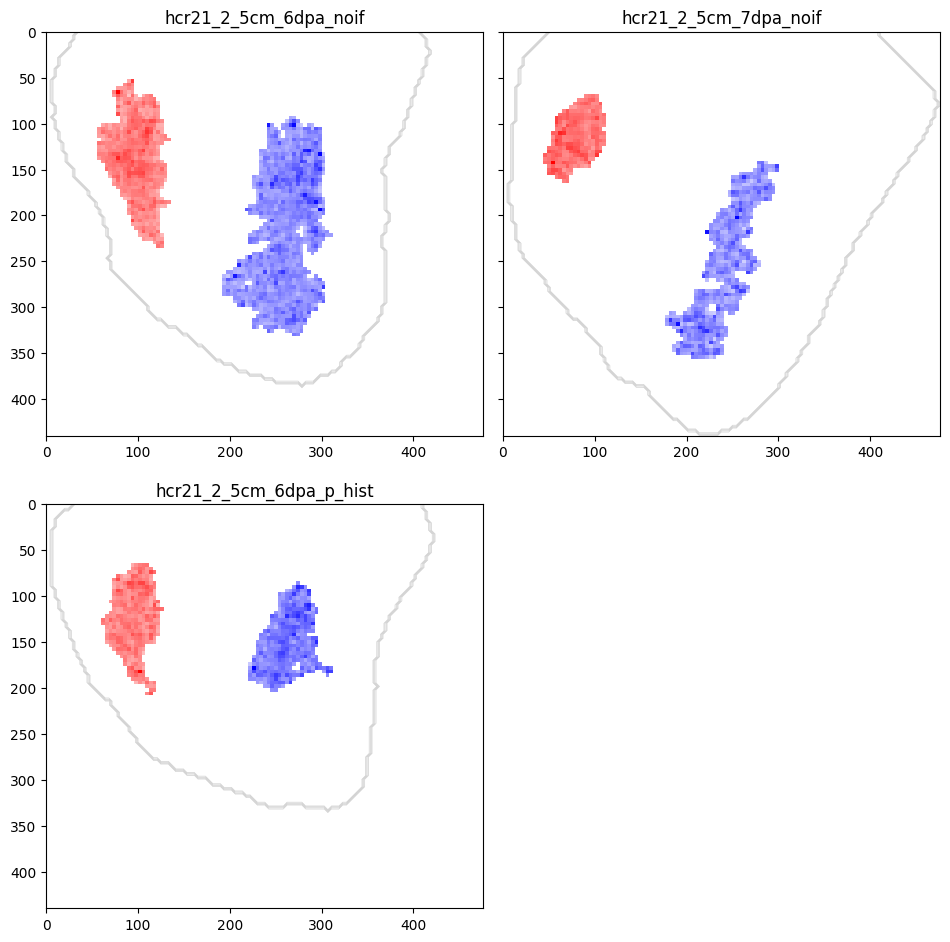

In [9]:
plot.shh_fgf_red_blue(img, pixel_size, 'shh50_clip', 'fgf50_clip', 100)
plt.savefig('fig/3cm_blastemas.pdf')
plt.show()